<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/DL/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dogs** vs. **Cats**
> #### Binary image classification using **Transfer Learning**

### Importing the necessary modules

In [54]:
import os
from zipfile import ZipFile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mplimg

from PIL import Image
from google.colab.patches import cv2_imshow

import cv2
import glob

from sklearn.model_selection import train_test_split as tts

### Importing the dataset

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 800M/814M [00:07<00:00, 145MB/s]
100% 814M/814M [00:07<00:00, 109MB/s]


#### Extracting the dataset from `.zip`

In [3]:
dpath = r"/content/dogs-vs-cats-redux-kernels-edition.zip"

with ZipFile(dpath, 'r') as zip:
  zip.extractall()

print("The dataset has been extracted!")

The dataset has been extracted!


#### Extracting the **training** and **testing** samples

In [4]:
train_path = r"/content/train.zip"
test_path = r"/content/test.zip"

with ZipFile(train_path, 'r') as zip1:
  zip1.extractall()

with ZipFile(test_path, 'r') as zip2:
  zip2.extractall()

print("The training and testing samples have been extracted.")

The training and testing samples have been extracted.


#### Enlisting the files in the samples
> The `files1` and `files2` lists hold the image titles.

In [5]:
tr_path = r"/content/train"
te_path = r"/content/test"

path1, dir1, files1 = next(os.walk(tr_path))
print(f"Number of TRAINING images : {len(files1)}")

path2, dir2, files2 = next(os.walk(te_path))
print(f"Number of TESTING images : {len(files2)}")

ctr_dog, ctr_cat = 0, 0

for file in files1:
  if file.startswith("cat"):
    ctr_cat += 1
  else:
    ctr_dog += 1

assert ctr_cat == ctr_dog, "The number of dog and cat images are NOT the same."

Number of TRAINING images : 25000
Number of TESTING images : 12500


### Image Processing

#### **Original** dimensions of images

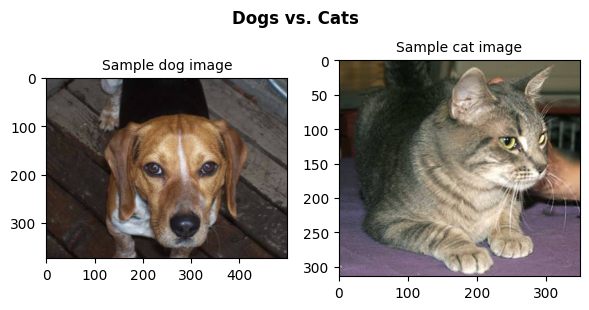

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
fig.suptitle("Dogs vs. Cats", fontweight='bold')

img1 = mplimg.imread(f"{tr_path}/{files1[2]}")
img2 = mplimg.imread(f"{tr_path}/{files1[680]}")

axs[0].imshow(img1)
# axs[0].axis("off")
axs[0].set_title("Sample dog image", fontsize=10)

axs[1].imshow(img2)
# axs[1].axis("off")
axs[1].set_title("Sample cat image", fontsize=10)

plt.tight_layout()
plt.show()

#### **Resizing** all the images to a **common** size
> Taking `2000` images from the `train` directory

In [7]:
new_tr_path = r"/content/resized_train/"
os.mkdir(new_tr_path)

for i in range(2000):
  img_file = os.listdir(tr_path)[i]
  img_filepath = tr_path + '/' + img_file

  img = Image.open(img_filepath)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  new_img_filepath = new_tr_path + img_file
  img.save(new_img_filepath)

len(os.listdir(new_tr_path))

2000

#### **Resized** dimensions of images

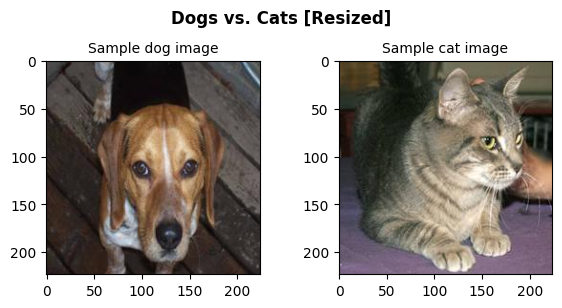

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
fig.suptitle("Dogs vs. Cats [Resized]", fontweight='bold')

img1 = mplimg.imread(f"{new_tr_path}/{files1[2]}")
img2 = mplimg.imread(f"{new_tr_path}/{files1[680]}")

axs[0].imshow(img1)
# axs[0].axis("off")
axs[0].set_title("Sample dog image", fontsize=10)

axs[1].imshow(img2)
# axs[1].axis("off")
axs[1].set_title("Sample cat image", fontsize=10)

plt.tight_layout()
plt.show()

#### Assigning **labels** to the images

| Class | Label |
| ----- | ----- |
| Cat   | 0     |
| Dog   | 1     |

In [53]:
labels = []
resized_imgs = os.listdir(r'/content/resized_train')

for resized_img in resized_imgs:
  if resized_img.startswith('dog'):
    labels.append(1)
  else:
    labels.append(0)

np.unique(np.array(labels), return_counts=True)

(array([0, 1]), array([ 958, 1042]))

#### Converting the images to `np.array` format
> Using the `cv2` and `glob` libraries

In [59]:
filesx = []
img_extensions = ['png', 'jpg']

# Locating all the compatible format i.e. '.jpg' or '.png' images
[filesx.extend(glob.glob(new_tr_path + '*.' + e)) for e in img_extensions]

# Converting the images into numpy arrays
dog_cat_images = np.asarray([cv2.imread(file) for file in filesx])

array([[[168, 152, 136],
        [236, 220, 204],
        [162, 146, 130],
        ...,
        [198, 227, 242],
        [196, 225, 239],
        [193, 222, 236]],

       [[170, 154, 138],
        [234, 218, 202],
        [165, 149, 133],
        ...,
        [198, 227, 242],
        [196, 225, 239],
        [194, 223, 237]],

       [[165, 150, 134],
        [225, 210, 194],
        [169, 154, 138],
        ...,
        [199, 228, 243],
        [197, 226, 240],
        [194, 223, 237]],

       ...,

       [[133, 151, 162],
        [133, 151, 162],
        [132, 149, 162],
        ...,
        [196, 222, 236],
        [189, 215, 229],
        [190, 216, 230]],

       [[132, 150, 161],
        [133, 151, 162],
        [135, 152, 165],
        ...,
        [194, 220, 234],
        [187, 213, 227],
        [192, 218, 232]],

       [[140, 158, 169],
        [142, 160, 171],
        [142, 159, 172],
        ...,
        [191, 217, 231],
        [184, 210, 224],
        [192, 218, 232]]], dtype=uint8)
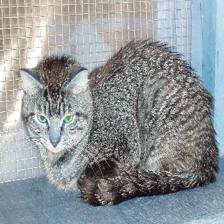

In [60]:
dog_cat_images[0]

### Model training

In [68]:
X = dog_cat_images
y = labels

X.ndim, np.unique(y, return_counts=True)

(4, (array([0, 1]), array([ 958, 1042])))